<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Decision_Trees_and_Support_Vector_Machines_Week_8_Elvis_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERVISED LEARNING: DECISION TREES**
# **NAIROBI HOSPITAL HYPOTHYROIDISM STUDY**

# 1.  INTRODUCTION


# **1.1 Defining the question**

A thyroid is a butterfly-shaped in your neck, among the endocrine glands that make one’s hormones. Thyroid hormones control many activities in the body that affect an individual’s weight gain or loss and calories burned. Hypothyroid is a condition where the thyroid doesn’t create and release enough thyroid hormone into one’s bloodstream. Common signs and symptoms of hypothyroidism include: depression, feeling tired, experiencing constipation, gaining weight, dry coarse skin and hair, having higher than normal medically recommended blood cholesterol and experiencing numbness and tingling in one’s hands. The condition is estimated to have affected 5% percent of the population with an extra 5% having being i undiagnosed. Nairobi Hospital, a leading private hospital in Nairobi collected data on hypothyroidism during a clinical camp. A data scientist will use the data collected to predict if a patients’ symptoms predict whether the patient has hypothyroidism or not.


# **1.2 Defining my metrics of success**

It is my hope by employing decision trees techniques random forest, ada boosted trees and gradient boosted trees and Support Vector Machines(SVM) techniques, the best model will help predict if a patient’s symptoms predict whether the patient has hypothyroidism. 

# **1.3 Understanding the context**

Undiagnosed hypothyroidism issue may lead to a patient losing some of their normal body functions. There is need to develop a clinical basis on narrowing down on hypothyroid symptoms, a move that will help the physicians save time on narrowing down the type of thyroid disorder a patient is suffering from.

# **1.4 Recording the experiment design**

The data will be subjected to data cleaning to help eliminate entry errors, then EDA will be used to explain the relationship between variables, A baseline model: Logistic regression will be used, the model will then be fitted and a decision tree will be created from Random forest, ada boost and gradient boosting. SVM techniques will also be employed to help determine the best model.

# **1.5 Data relevance**

The data being used was collected by a group of physicians working at Nairobi Hospital during a clinical camp.The link to the dataset is provided below [link text](http://bit.ly/hypothyroid_data)

Importing the libraries needed

In [ ]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

# **2.1 Loading the datasets**

In [ ]:
#Loading the fifa_ranking datasets
hypothyroid = pd.read_csv('hypothyroid.csv')
hypothyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
#Viewing the tail of the dataset
hypothyroid.tail(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
#Viwing the names of the columns
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
#Viewing the shape of the dataset
hypothyroid.shape

(3163, 26)

The dataset has 3163 entries and 26 varaibles

In [ ]:
#Viewing the datatypes
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

Their is need to convert the data types to the right numerical forms

In [ ]:
#checking the number of missing values
hypothyroid_df = hypothyroid.replace(['?'], np.nan)
hypothyroid_df.isnull().sum().sum()

5329

there are 5329 missing values in the dataset as represented by the "?" string

In [ ]:
#identifying missing values in the datasets
# Identify any missing values in the hypothyroid_df dataset
hypothyroid_df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Their are columns that may need to be dropped to avoid skewing the results

In [ ]:
# Check for duplicate values in the hypothyroid ranking dataset
hypothyroid_df.duplicated().sum()

77

In [ ]:
#Checking for unique values in the dataset
hypothyroid_df.nunique()

status                         2
age                           92
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          268
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
TBG_measured                   2
TBG                           52
dtype: int64

In [ ]:
# Drop columns that we will not use in our analysis
#
hypothyroid_df.drop(['query_on_thyroxine','query_hypothyroid','query_hyperthyroid','lithium','TSH_measured', 'T3_measured','TT4_measured','T4U_measured','FTI_measured', 'FTI', 'TBG_measured', 'TBG'],axis=1, inplace=True)
# Confirm changes
hypothyroid_df.head(2)

      

,status,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,goitre,TSH,T3,TT4,T4U
0,hypothyroid,72,M,f,f,f,f,f,f,f,30,0.60,15,1.48
1,hypothyroid,15,F,t,f,f,f,f,f,f,145,1.70,19,1.13


I narrowed down the columns that have informaion on the signs and sysmptoms of Hypothyroidism

In [ ]:
hypothyroid_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'goitre', 'TSH', 'T3',
       'TT4', 'T4U'],
      dtype='object')

# **2.2 Tydying the dataset**

In [ ]:
#removing the duplicates from the hypothyroid dataset
hypothyroid_df.drop_duplicates(subset=None, keep='first', inplace= False)

,status,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,goitre,TSH,T3,TT4,T4U
0,hypothyroid,72,M,f,f,f,f,f,f,f,30,0.60,15,1.48
1,hypothyroid,15,F,t,f,f,f,f,f,f,145,1.70,19,1.13
2,hypothyroid,24,M,f,f,f,f,f,f,f,0,0.20,4,1
3,hypothyroid,24,F,f,f,f,f,f,f,f,430,0.40,6,1.04
4,hypothyroid,77,M,f,f,f,f,f,f,f,7.30,1.20,57,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,5.80,1.70,86,0.91
3159,negative,29,F,f,f,f,f,f,f,f,0.80,1.80,99,1.01
3160,negative,77,M,f,f,f,f,f,f,f,1.20,0.60,71,0.68
3161,negative,74,F,f,f,f,f,f,f,f,1.30,0.10,65,0.48


A reduction of entries suggest the duplicates have been elimanated

In [ ]:
#checking for any anomalies of the results dataset
col = ['status', 'age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'goitre', 'TSH', 'T3',
       'TT4', 'T4U']
for i in col:

  u = hypothyroid_df[i].unique()
  print('Unique values of ', i , 'is' , u)

Unique values of  status is ['hypothyroid' 'negative']
Unique values of  age is ['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
Unique values of  sex is ['M' 'F' nan]
Unique values of  on_thyroxine is ['f' 't']
Unique values of  on_antithyroid_medication is ['f' 't']
Unique values of  thyroid_surgery is ['f' 't']
Unique values of  pregnant is ['f' 't']
Unique values of  sick is ['f' 't']
Unique values of  tumor is ['f' 't']
Unique values of  goitre is ['f' 't']
Unique values of  TSH is ['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '

The columns with anomalies include: sex,age, TT4, T3,TSH and  T4U

We create a loop so as to change the datatset into the right data types

In [ ]:
#changing the column datatypes

# An array of numerical columns and categorical columns

#creating a copy
hypothyroid_1 = hypothyroid_df

#categorical columns array
categorical_columns = ['status','sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'goitre']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U']


# Using a conditional for loop to convert each columns into the right data types(the numerical and categorical lists)

for column in hypothyroid_df.columns:
  if column in numerical_columns:
    hypothyroid_1[column]= pd.to_numeric(hypothyroid_1[column])
  
  else:
    hypothyroid_1[column] = hypothyroid_1[column].astype('category')
    
    
# checking the data types to confirm changes

hypothyroid_1.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
on_antithyroid_medication    category
thyroid_surgery              category
pregnant                     category
sick                         category
tumor                        category
goitre                       category
TSH                           float64
T3                            float64
TT4                           float64
T4U                           float64
dtype: object

In [ ]:
#converting some categoerical values in the columns to numerical form
from sklearn.preprocessing import LabelEncoder
#Converting confideration, home team, away team, tournament, city and country
print(hypothyroid["age"].unique())
print(hypothyroid["TT4"].unique())
print(hypothyroid["T3"].unique())
print(hypothyroid["TSH"].unique())
print(hypothyroid["T4U"].unique())
print(hypothyroid["sex"].unique())

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
['15' '19' '4' '6' '57' '27' '54' '34' '39' '7.60' '53' '38' '98' '44'
 '37' '81' '13' '17' '12' '50' '23' '14' '3.90' '52' '32' '30' '84' '10'
 '55' '24' '28' '11' '6.60' '31' '33' '41' '9' '78' '42' '8.10' '65' '16'
 '9.70' '46' '22' '61' '2.30' '21' '7.50' '18' '66' '25' '43' '2' '3' '58'
 '59' '71' '74' '56' '40' '20' '48' '230' '70' '4.10' '63' '5.30' '2.90'
 '62' '75' '68' '45' '47' '36' '80' '109' '8.60' '83' '82' '101' '76'
 '103' '112' '206' '110' '93' '79' '121' '?' '107' '88' '187' '254' '115'
 '113' '260' '117' '164' 

In [ ]:
# Finding the mode of numerical columns
hypothyroid_1['sex'].mode()

0    F
Name: sex, dtype: category
Categories (2, object): ['F', 'M']

In [ ]:
# Finding the mode of numerical columns
hypothyroid_1['age'].mode()

0    59.0
1    60.0
dtype: float64

In [ ]:
# Finding the mode of numerical columns
hypothyroid_1['TT4'].mode()

0    ?
dtype: object

In [ ]:
# Finding the mode of numerical columns
hypothyroid_1['T3'].mode()

0    1.6
1    1.8
dtype: float64

In [ ]:
# Finding the mode of numerical columns
hypothyroid_1['TSH'].mode()

0    0.0
dtype: float64

In [ ]:
# Finding the mode of numerical columns
hypothyroid_1['T4U'].mode()


0    0.98
dtype: float64

In [ ]:
# Finding the mode of numerical columns
hypothyroid_1['T4U'].mean()

0.9781989708404781

In [ ]:
# A anomaly noticed in the sex column is ?,
# We will replace it with F as it is the mode of the column
hypothyroid_2 = hypothyroid_1
hypothyroid_2['sex'] = hypothyroid_2['sex'].replace(['?'],'F')


# A anomaly noticed is ? in age column
# We will replace it with 0 age column so as not to skew the data
hypothyroid_2['age'] = hypothyroid_2['age'].replace(['?'],0)



# A anomaly noticed is ? in the TT4 column
# We will replace it with 0
hypothyroid_2['TT4'] = hypothyroid_2['TT4'].replace(['?'],0)


# A anomaly noticed is ? in the T3 column
# We will replace it with 0
hypothyroid_2['T3'] = hypothyroid_2['T3'].replace(['?'],0)


# A anomaly noticed is ?
# We will replace it with 0.
hypothyroid_2['TSH'] = hypothyroid_2['TSH'].replace(['?'],0)



# A anomaly noticed is ?
# We will replace it with a 0
hypothyroid_2['T4U'] = hypothyroid_2['T4U'].replace(['?'],0)

#viweing the changes
print(hypothyroid_2)

           status   age sex on_thyroxine  ...    TSH   T3    TT4   T4U
0     hypothyroid  72.0   M            f  ...   30.0  0.6   15.0  1.48
1     hypothyroid  15.0   F            t  ...  145.0  1.7   19.0  1.13
2     hypothyroid  24.0   M            f  ...    0.0  0.2    4.0  1.00
3     hypothyroid  24.0   F            f  ...  430.0  0.4    6.0  1.04
4     hypothyroid  77.0   M            f  ...    7.3  1.2   57.0  1.28
...           ...   ...  ..          ...  ...    ...  ...    ...   ...
3158     negative  58.0   F            f  ...    5.8  1.7   86.0  0.91
3159     negative  29.0   F            f  ...    0.8  1.8   99.0  1.01
3160     negative  77.0   M            f  ...    1.2  0.6   71.0  0.68
3161     negative  74.0   F            f  ...    1.3  0.1   65.0  0.48
3162     negative  56.0   F            t  ...    0.0  1.8  139.0  0.97

[3163 rows x 14 columns]


I chose to replace the ? string with a 0 in age, TT4,T3,TSH and T4U columns as 0, as a result of the string being the most common factor in the columns.

In [ ]:
# Check for duplicate values in the hypothyroid_2  dataset
hypothyroid_2.duplicated().sum()

174

The new dataset has 174 duplicates

In [ ]:
#removing the duplicates from the hypothyroid dataset
hypothyroid_2.drop_duplicates(subset=None, keep='first', inplace= False)

,status,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,goitre,TSH,T3,TT4,T4U
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,145.0,1.7,19.0,1.13
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,5.8,1.7,86.0,0.91
3159,negative,29.0,F,f,f,f,f,f,f,f,0.8,1.8,99.0,1.01
3160,negative,77.0,M,f,f,f,f,f,f,f,1.2,0.6,71.0,0.68
3161,negative,74.0,F,f,f,f,f,f,f,f,1.3,0.1,65.0,0.48


A reduction of the entries suggest that the duplicates in the new dataset have been eliminated

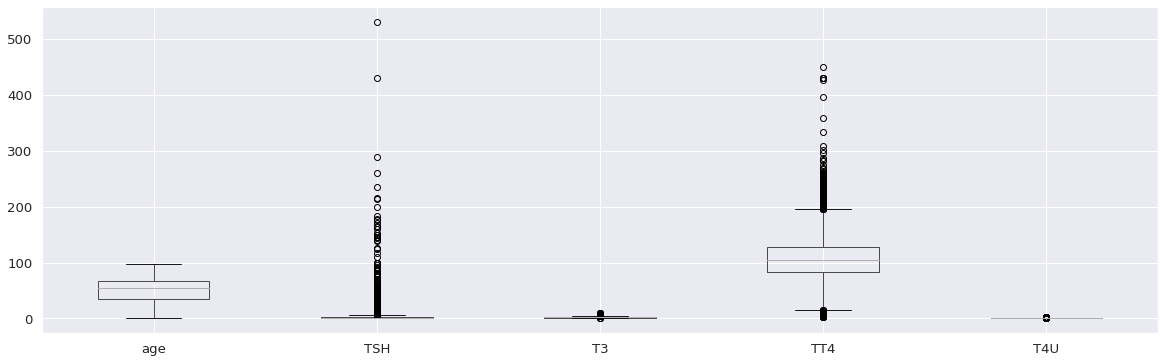

In [ ]:
#checking for outliers
hypothyroid_df= hypothyroid_2
plt.figure(figsize = (20, 6))
hypothyroid_2.boxplot()
plt.show()

We intend to retain the outliers till the Support Vector Machine learning analysis

In [ ]:
#converting some categoerical values in the columns to numerical form
from sklearn.preprocessing import LabelEncoder
#Converting sex,age
print(hypothyroid_2["age"].unique())

print(hypothyroid_2["sex"].unique())

[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.]
['M', 'F', NaN]
Categories (2, object): ['F', 'M']


# **3. Exploratory Data Analysis**

# **3.1 Univariate Analysis**

The variables that are positively skewed are: T3,T4U,TT4 and T4U.

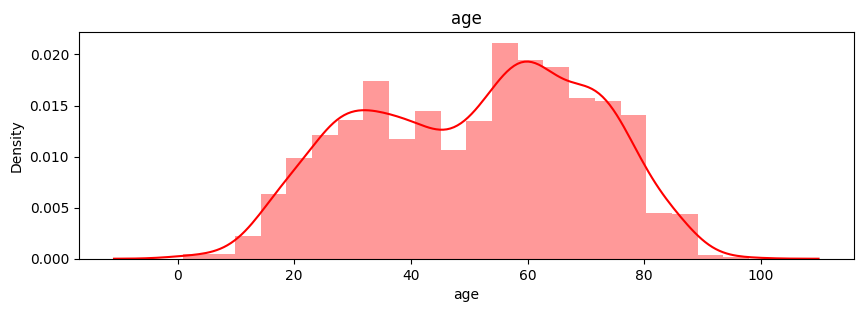

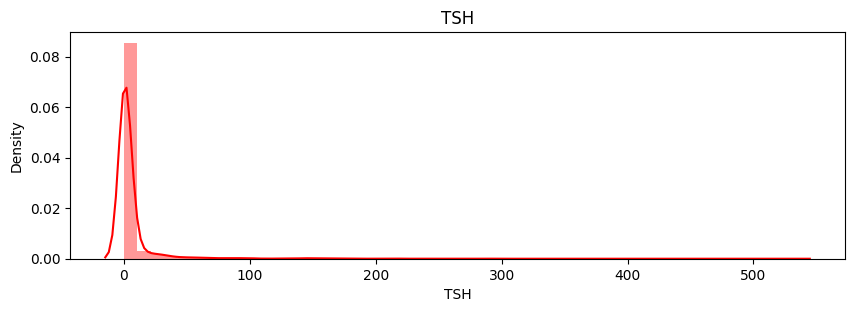

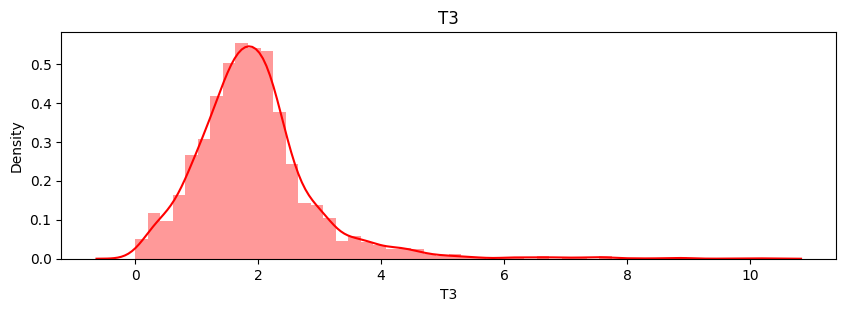

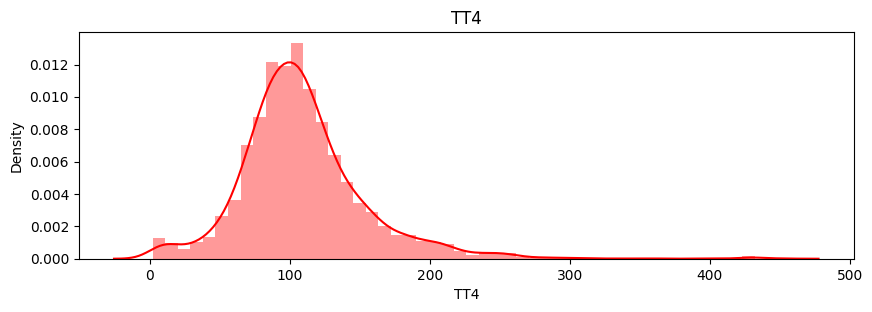

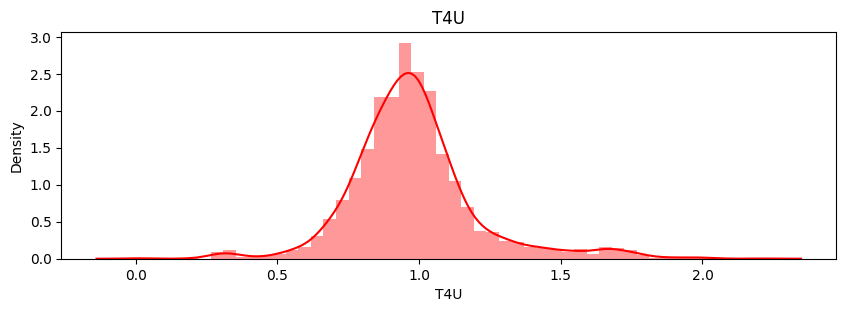

In [ ]:
#Histogram of the numerical values
cols = ['age','TSH','T3', 'TT4', 'T4U']

for i in cols:
  plt.figure(figsize = (10,3), dpi=100)
  sns.distplot(hypothyroid_2[i], kde = True, color = 'red')
  plt.title(i, color = 'Black')
  plt.show()

The values that are positively skewed in the dataset are: T4U,TT4,T3 and TSH

In [ ]:
hypothyroid_2.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'goitre', 'TSH', 'T3',
       'TT4', 'T4U'],
      dtype='object')

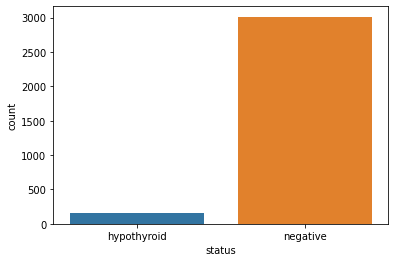

In [ ]:
# Plotting the count of the status column

sns.countplot(hypothyroid_2['status'])

The hospital captured data from more negative test results as opposed to the positive hypothyroid tests

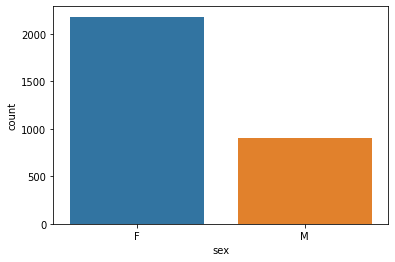

In [ ]:
# Plotting the count of sex column

sns.countplot(hypothyroid_2['sex'])

In the ratio of women to men, the women population is more than the men's population

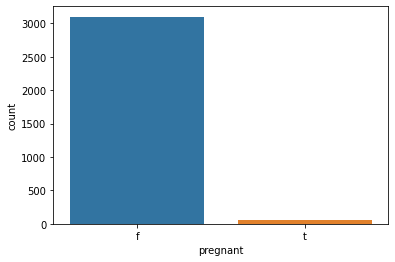

In [ ]:
# Plotting the count of pregnant women suffering from hypothyroid

sns.countplot(hypothyroid_2['pregnant'])

The number of pregnant women suffering from hypothyroid is significantly lower

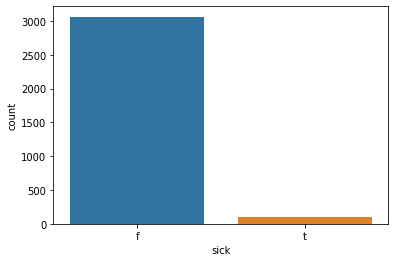

In [ ]:
# Plotting the count of individuals who are sickk and suffering from hypothyroid
sns.countplot(hypothyroid_2['sick'])

Individuals that are having other underlying diseases suffering from hypothyroid is significantly lower

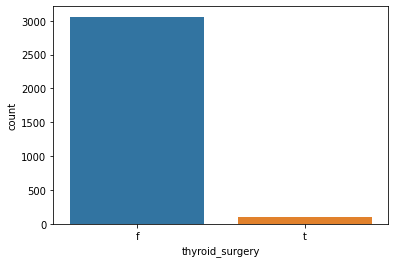

In [ ]:
# Plotting the count of patients suffering from hypothyroidism after a thyroid surgery

sns.countplot(hypothyroid_2['thyroid_surgery'])

The number of individuals that underwent a thyroid surgery and are suffering from hypothyroid is significantly lower

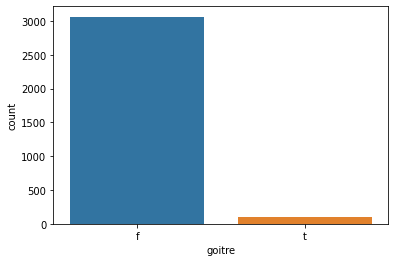

In [ ]:
# Plotting the count of patients with goitre

sns.countplot(hypothyroid_2['goitre'])

**Statitistical summaries**

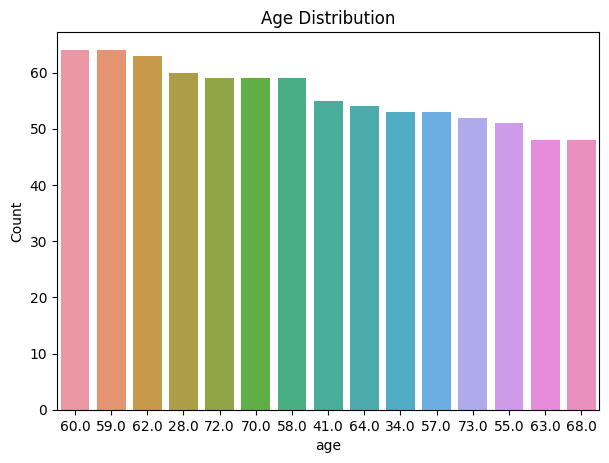

In [ ]:
#Countplot showing the age distribution
plt.figure(figsize = (7,5), dpi=100)
sns.countplot(hypothyroid_2['age'], order=hypothyroid_2['age'].value_counts().index[:15])
plt.title('Age Distribution')
plt.ylabel("Count")
plt.show()

Most patients were 60 years and above.

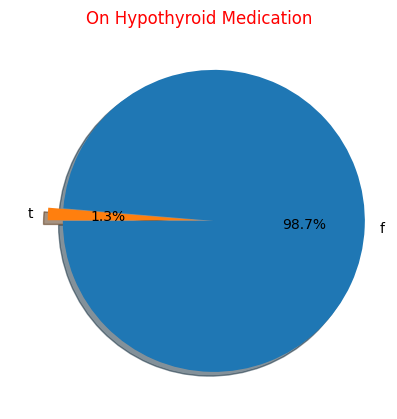

In [ ]:
# Pie chart showing the percentage of individuals on hypothyroid medication
accounts = hypothyroid_2['on_antithyroid_medication'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0.1,0), shadow=True, startangle=180)
plt.title('On Hypothyroid Medication', color='Red')
plt.show()

Most of the patients are not on thyroid medication

In [ ]:
# Frequency Table of T4U 
hypothyroid_2.T4U.value_counts()

0.98    86
0.99    81
1.01    80
0.96    80
1.00    78
        ..
1.86     1
2.01     1
0.30     1
1.97     1
0.38     1
Name: T4U, Length: 158, dtype: int64

In [ ]:
# Frequency Table of the TSH values
hypothyroid_2.TSH.value_counts()

0.00      894
0.90       76
0.70       75
0.80       69
0.60       65
         ... 
9.40        1
126.00      1
530.00      1
57.00       1
0.08        1
Name: TSH, Length: 239, dtype: int64

This suggests that the levels of TSH hormeones are not hgh in many patients

In [ ]:
# The Kurtosis of numerical columns
hypothyroid_2['age'].kurt()

-0.9607597313797003

A negative kurtosis suggest that the distribution of the data is light tailed suggesting fewer extreme values

**Recommendations**


1. The hospital should consider conducting a thyroid study(hypothyroid) witha balanced number of men and women
2. The population mostly affected are the elderly suggesting more testing on that particular age group

# **3.2 Bivariate Analysis**

<Figure size 700x500 with 0 Axes>

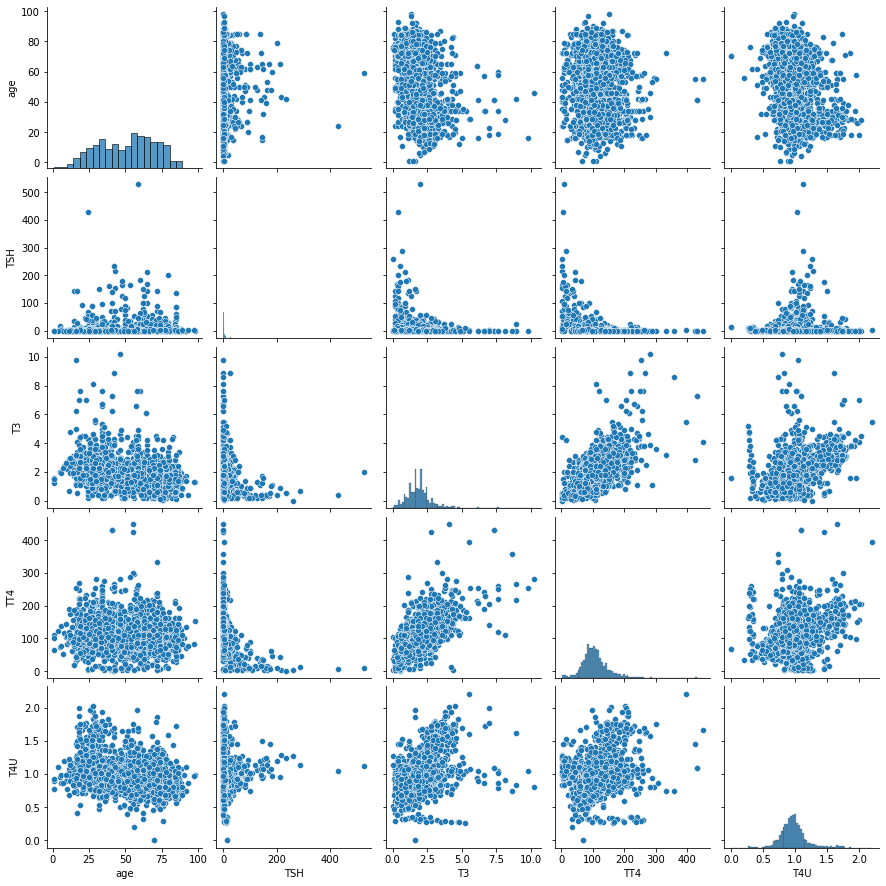

In [ ]:
#Plotting a pairplot of all the numerical values
plt.figure(figsize = (7, 5), dpi=100)
y =['age','TSH','T3', 'TT4', 'T4U']
sns.pairplot(hypothyroid_2[y])

Their is no relationship between some columns

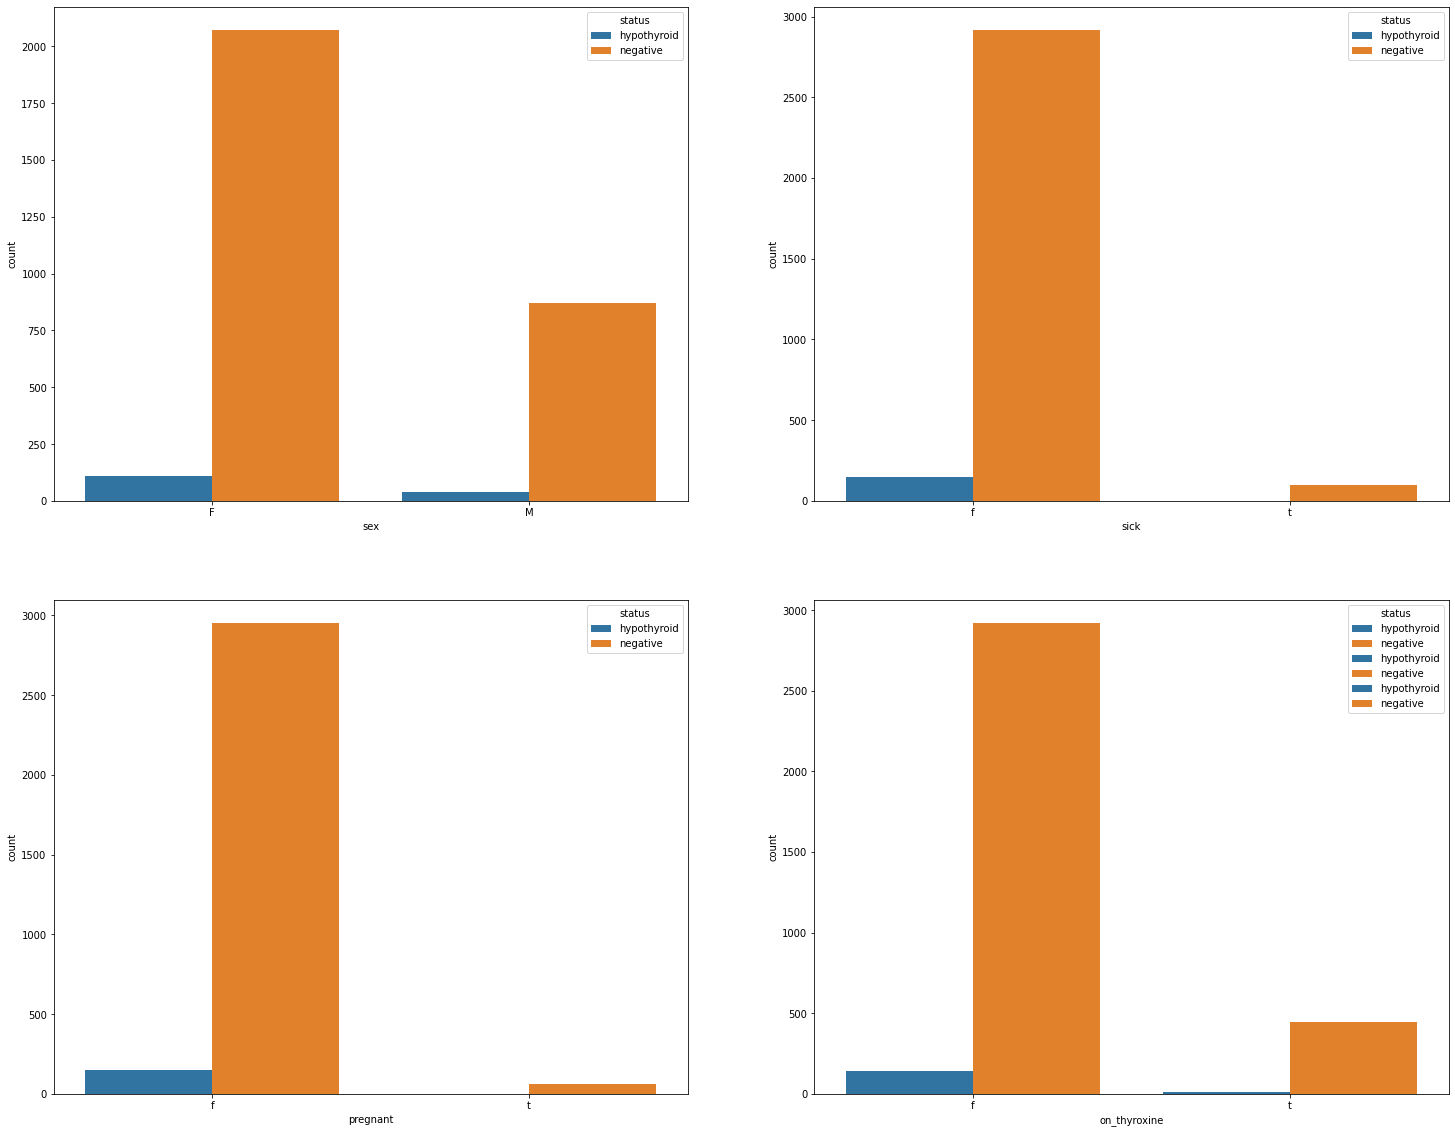

In [ ]:
#Plotting a relationship between status and some variables: age, sex, thyroid surgery, TSH, pregnant, on_thyroxine and sick.
fig,axes = plt.subplots(2,2, figsize=(25,20))
sns.countplot(x='sex',hue='status',data=hypothyroid_2,ax=axes[0,0])
sns.countplot(x='sick',hue='status',data=hypothyroid_2,ax=axes[0,1])
sns.countplot(x='pregnant',hue='status',data=hypothyroid_2,ax=axes[1,0])
sns.countplot(x='TSH',hue='status',data=hypothyroid_2,ax=axes[1,1])
sns.countplot(x='thyroid_surgery',hue='status',data=hypothyroid_2,ax=axes[1,1])
sns.countplot(x='on_thyroxine',hue='status',data=hypothyroid_2,ax=axes[1,1])

**Summaries from the above visualizations**
1. The number of female suffering ffrom hypothyroidism is prevalent in comparison to the male gender.
2. After thyroxine tests were ran, the number of individuals 
suffering from hypothyroid is significantly lower


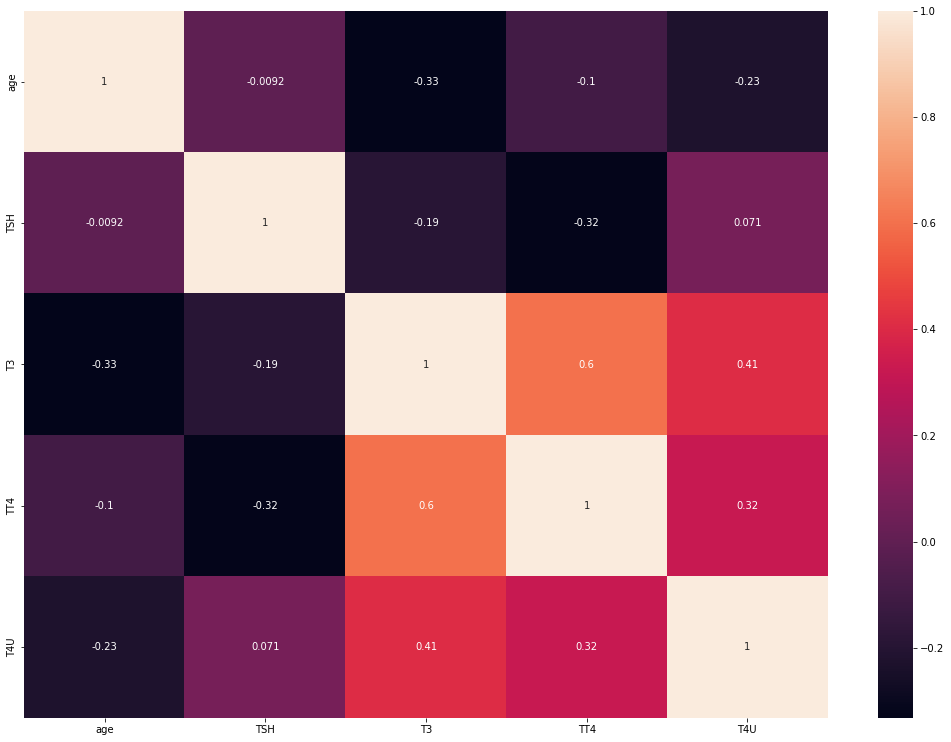

In [ ]:
#A correlation matrix of the numerical values
corr = hypothyroid_2.corr()
fig, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(corr, annot=True)

The positively correlated value pairs include: T3 and TT4, T3 and T4U and TT4 and T4U. The negatively correlated value pairs include: age and T3, age and T4U and  TSH and T4U. 

**Recommendations**
1. The Hospital should cosider doing more research on pregnant women diagonised with the disease. 


# **3.3 Multivariate Analysis**

We use the Linear Discriminant Analysis(LDA) to derive the relationship of the variables to the target varaiable. The technique is also efficient in  Supervised Models

In [ ]:
hypothyroid_2.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'goitre', 'TSH', 'T3',
       'TT4', 'T4U'],
      dtype='object')

In [ ]:
#These are the columns that we will use for the analysis
dfc = ['status', 'age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'goitre', 'TSH', 'T3',
       'TT4', 'T4U']

In [ ]:
#Encoding the multiple columns at ago
hypothyroid_3 = hypothyroid_2[dfc].apply(LabelEncoder().fit_transform)
hypothyroid_3.head()

,status,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,goitre,TSH,T3,TT4,T4U
0,0,69,1,0,0,0,0,0,0,0,165,7,22,116
1,0,12,0,1,0,0,0,0,0,0,221,18,26,81
2,0,21,1,0,0,0,0,0,0,0,0,3,5,68
3,0,21,0,0,0,0,0,0,0,0,237,5,8,72
4,0,74,1,0,0,0,0,0,0,0,106,13,63,96


In [ ]:
#Importing the libraries needed for multivariate analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
#These are the columns that we will use for the analysis
coll = ['status', 'age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'goitre', 'TSH', 'T3',
       'TT4', 'T4U']

In [ ]:
hypothyroid_3.shape

(3163, 14)

In [ ]:
#Step 1: Seperating our target label (diagnosis) from other features
X = hypothyroid_3.drop(['status'], axis = 1)
Y = hypothyroid_3['status']

In [ ]:
#Step 2: Confirming the features don't contain the target variable
X[0:15]

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,goitre,TSH,T3,TT4,T4U
0,69,1,0,0,0,0,0,0,0,165,7,22,116
1,12,0,1,0,0,0,0,0,0,221,18,26,81
2,21,1,0,0,0,0,0,0,0,0,3,5,68
3,21,0,0,0,0,0,0,0,0,237,5,8,72
4,74,1,0,0,0,0,0,0,0,106,13,63,96
5,82,0,0,0,0,0,0,0,0,218,12,33,87
6,61,0,0,0,1,0,0,0,0,110,14,60,54
7,69,0,0,0,0,0,0,0,0,156,20,40,73
8,17,0,0,0,0,0,0,0,0,211,69,45,89
9,39,0,0,0,0,0,0,0,0,183,69,12,70


In [ ]:
#Checking the unique values of the target variable
Y.unique()

array([0, 1])

In [ ]:
#Step 3: Create an instance of LDA and train the model
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,Y)
lda_feat = X_lda.transform(X)

#Display the coefficients of the reducted colums
X_lda.coef_

array([[-0.00404187,  0.34315783, -1.30881795,  0.99512108, -0.83086478,
         0.09731778,  1.52654728,  0.45452962, -0.99986667, -0.02702275,
         0.04584576,  0.05973535, -0.05485268]])

In [ ]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
sick,1.526547
on_antithyroid_medication,0.995121
tumor,0.454530
sex,0.343158
pregnant,0.097318
TT4,0.059735
T3,0.045846
age,-0.004042
TSH,-0.027023
T4U,-0.054853


The factors that influence the outcome of a hypothyroid test include: sick, on antithyroid medication, tumor and sex. Weakly determinants include pregnancy, TT4 and T3 tests. The rest do not.

# 4.**MODEL BUILDING** 

Predicting our target variable, we first run the dataset through a basline mode so as to use it as our basis on predicting the accuracy of the classification models. Our Y variable in this case is the Status column which contains two features: hypothyroid and negative test outcome. We use the linear regression model as our baseline model due to the nature of our target variable

# 4.1 Basline Model: Logistic Regression

In [ ]:
#Importing the libraries we need
import sklearn.linear_model as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [ ]:
hypothyroid_2.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'goitre', 'TSH', 'T3',
       'TT4', 'T4U'],
      dtype='object')

In [ ]:
#Dropping the columns we do not need
hypothyroid_4 = hypothyroid_3.drop(columns= ['on_thyroxine', 'thyroid_surgery','T3', 'T4U'])
hypothyroid_4.head(5)


,status,age,sex,on_antithyroid_medication,pregnant,sick,tumor,goitre,TSH,TT4
0,0,69,1,0,0,0,0,0,165,22
1,0,12,0,0,0,0,0,0,221,26
2,0,21,1,0,0,0,0,0,0,5
3,0,21,0,0,0,0,0,0,237,8
4,0,74,1,0,0,0,0,0,106,63


In [ ]:
#We proceed to check for multicollinearlity between variables
# Let's display the correlations between the variables
correlations = hypothyroid_4.corr()

correlations

,status,age,sex,on_antithyroid_medication,pregnant,sick,tumor,goitre,TSH,TT4
status,1.000000,-0.009549,0.023808,0.013020,0.021306,0.023216,0.025340,-0.010847,-0.267841,0.329045
age,-0.009549,1.000000,0.088429,-0.044450,-0.141885,0.039086,-0.061951,-0.051875,-0.137183,-0.137631
sex,0.023808,0.088429,1.000000,-0.026636,-0.082967,0.010552,-0.012721,-0.087589,-0.030287,-0.144779
on_antithyroid_medication,0.013020,-0.044450,-0.026636,1.000000,0.003231,-0.020852,-0.013129,-0.020852,0.039679,0.032671
pregnant,0.021306,-0.141885,-0.082967,0.003231,1.000000,-0.025625,0.004117,0.078337,-0.027517,0.118550
sick,0.023216,0.039086,0.010552,-0.020852,-0.025625,1.000000,-0.020343,-0.032311,-0.018885,-0.052665
tumor,0.025340,-0.061951,-0.012721,-0.013129,0.004117,-0.020343,1.000000,-0.020343,0.010431,-0.018214
goitre,-0.010847,-0.051875,-0.087589,-0.020852,0.078337,-0.032311,-0.020343,1.000000,0.040354,0.095429
TSH,-0.267841,-0.137183,-0.030287,0.039679,-0.027517,-0.018885,0.010431,0.040354,1.000000,0.242566
TT4,0.329045,-0.137631,-0.144779,0.032671,0.118550,-0.052665,-0.018214,0.095429,0.242566,1.000000


In [ ]:
#creating an inverse matrix
vif= pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

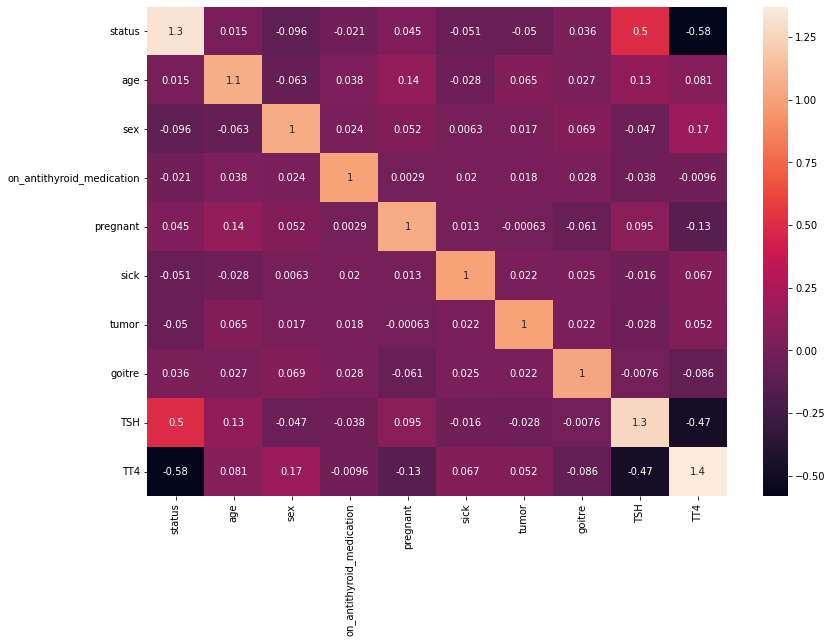

In [ ]:
#plotting a heatmap to represent the VIF scores

plt.figure(figsize =(13,9))
sns.heatmap(vif, annot = True)

From the heat map above, the VIF scores read diagonally, suggest that TT4 is the highest with 1.4. Removing TT4 from the next analysis to have a look at the changes

In [ ]:
revised = hypothyroid_4.drop(columns=['TT4'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,status,age,sex,on_antithyroid_medication,pregnant,sick,tumor,goitre,TSH
status,1.082239,0.049579,-0.022858,-0.025092,-0.010085,-0.022604,-0.028499,-0.000703,0.296594
age,0.049579,1.057141,-0.073047,0.038567,0.143425,-0.031973,0.061605,0.032474,0.155948
sex,-0.022858,-0.073047,1.020929,0.025302,0.068704,-0.002061,0.010552,0.080183,0.012279
on_antithyroid_medication,-0.025092,0.038567,0.025302,1.005583,0.002013,0.020298,0.017944,0.027448,-0.041420
pregnant,-0.010085,0.143425,0.068704,0.002013,1.033522,0.019243,0.004250,-0.068903,0.050514
sick,-0.022604,-0.031973,-0.002061,0.020298,0.019243,1.004192,0.019709,0.029404,0.006793
tumor,-0.028499,0.061605,0.010552,0.017944,0.004250,0.019709,1.005919,0.025380,-0.010602
goitre,-0.000703,0.032474,0.080183,0.027448,-0.068903,0.029404,0.025380,1.017632,-0.037065
TSH,0.296594,0.155948,0.012279,-0.041420,0.050514,0.006793,-0.010602,-0.037065,1.105974


As seen the VIF scores have changed suggesting that status and TT4 are collinear

In [ ]:
#Viewing the columns of the dataset
hypothyroid_4.columns

Index(['status', 'age', 'sex', 'on_antithyroid_medication', 'pregnant', 'sick',
       'tumor', 'goitre', 'TSH', 'TT4'],
      dtype='object')

In [ ]:
#Getting our attributes and labels
X_hyp = np.array(hypothyroid_4[['age', 'sex', 'on_antithyroid_medication', 'pregnant', 'sick',
       'tumor', 'goitre', 'TSH', 'TT4']])
y_hyp = hypothyroid_4['status']
print(X_hyp.shape)
print(y_hyp.shape)

(3163, 9)
(3163,)


In [ ]:
#Training and testing dataset
X_hyp_train, X_hyp_test, y_hyp_train,y_hyp_test = train_test_split(X_hyp,y_hyp,test_size=0.2,random_state =0)

In [ ]:
#Fitting in the model
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_hyp_train, y_hyp_train)

LogisticRegression(solver='liblinear')

In [ ]:
#Cross Validating the model
from sklearn.model_selection import cross_val_score
score = cross_val_score(LogisticRegression(solver = 'liblinear', multi_class = 'auto'),X_hyp,y_hyp, cv=3)
LogReg.fit(X_hyp_train, y_hyp_train)

LogisticRegression(solver='liblinear')

In [ ]:
#Making a prediction using the abbove model
y_hyp_pred = LogReg.predict(X_hyp_test)
y_hyp_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#Conducting an analyis of the accuracy of the model
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std()* 2))

Accuracy: 0.98 (+/- 0.01)


The model is accurate as it has a 98% accurate prediction

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_hyp_test, y_hyp_pred)
confusion_matrix


array([[ 16,  10],
       [  8, 599]])

As observed above, the number of the positive values in the confusion matrix suggest that the model is accurate.

# 4.2. Approach 1: Decision Trees

# 4.2.1**Random Forest** 

In [ ]:
#Viewing the dataset
hypothyroid_4.head(5)

,status,age,sex,on_antithyroid_medication,pregnant,sick,tumor,goitre,TSH,TT4
0,0,69,1,0,0,0,0,0,165,22
1,0,12,0,0,0,0,0,0,221,26
2,0,21,1,0,0,0,0,0,0,5
3,0,21,0,0,0,0,0,0,237,8
4,0,74,1,0,0,0,0,0,106,63


In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone's symptoms will reveal if they have Hypothyroidism, so let's use that column as our Y 
y = hypothyroid_4['status'].values


test_features = hypothyroid_4.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = hypothyroid_4[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

In [ ]:
# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.965227
std,0.198617,0.183302
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


The predicted values are close to the actual values suggesting low bias

In [ ]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.023182297154899896
Mean Squared Error: 0.023182297154899896
Root Mean Squared Error: 0.1522573385912807


The RMSE value has been predicted to a 15%.

Visualizing 50 trees

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
pip install --upgrade mglearn

     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=75f0521b7a4a3e6f92492dea0b4c36297f8c56b6fe7aeca85c577b79f0f46a17
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


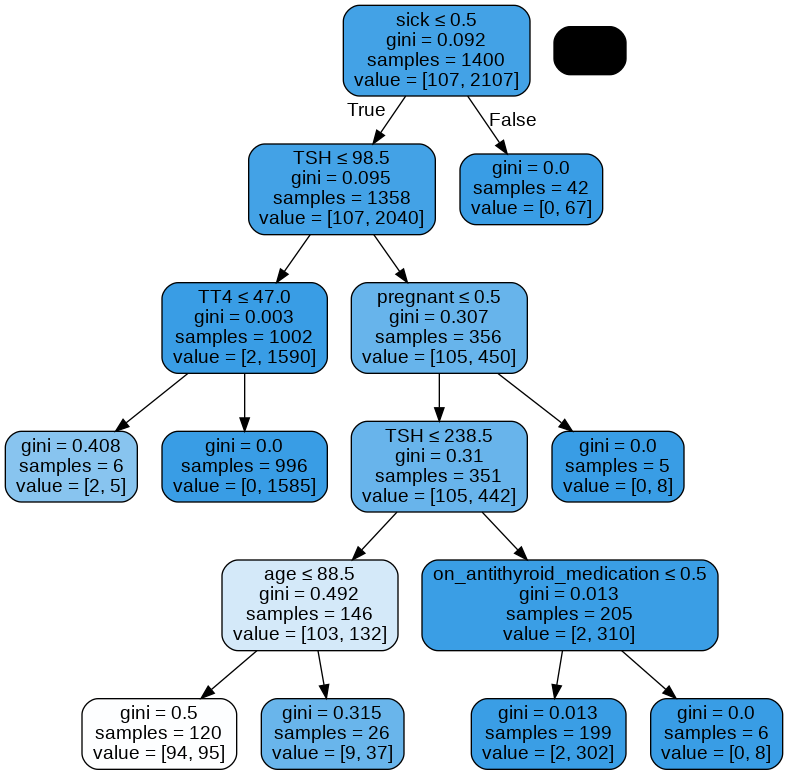

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid.png')
Image(graph.create_png())

# 4.2.2 **Adaboost Trees**

It is important to note, we are going to use the trained dataset above

In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone's symptoms will reveal if they have Hypothyroidism, so let's use that column as our Y 
y = hypothyroid_4['status'].values


test_features = hypothyroid_4.columns.to_list()
test_features.remove('status')

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 4
# What happens if you decrease this parameter? if you increase it? 
# What happens if you remove it altogether?
tree = DecisionTreeClassifier(max_depth=4)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

In [ ]:
#ViEWING the train
X_train.shape

(2530, 13)

In [ ]:
#Viewing the y column
y_train.shape

(2530,)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)


In [ ]:
#viewing the shape of the training dataset
y_train.shape

(2530,)

In [ ]:
#Viewing the shape of the traing dataset
X_train.shape

(2530, 9)

In [ ]:
#Predicting accuracy score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_score (y_test, y_pred_ada)

0.976303317535545

Adaboost has an accuracy score of 97%

# **4. 2.3Gradient Boasting**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone's symptoms will reveal if they have Hypothyroidism, so let's use that column as our Y 
y = hypothyroid_4['status'].values


test_features = hypothyroid_4.columns.to_list()
test_features.remove('status')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)
accuracy_score(y_test, y_pred_ada)

0.9699842022116903

Gradient boost has an accuracy score of 97%

# **4.3. Second Approach using: Support Vector Machine**

In [ ]:
#Viewing the dataset to be used
hypothyroid_4.head(5)

,status,age,sex,on_antithyroid_medication,pregnant,sick,tumor,goitre,TSH,TT4
0,0,69,1,0,0,0,0,0,165,22
1,0,12,0,0,0,0,0,0,221,26
2,0,21,1,0,0,0,0,0,0,5
3,0,21,0,0,0,0,0,0,237,8
4,0,74,1,0,0,0,0,0,106,63


In [ ]:
#Viewing its columns
hypothyroid_4.columns

Index(['status', 'age', 'sex', 'on_antithyroid_medication', 'pregnant', 'sick',
       'tumor', 'goitre', 'TSH', 'TT4'],
      dtype='object')

In [ ]:
#Importing libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

Identifying our target variable

In [ ]:

# Removing the target column
X_hypo = hypothyroid_4.drop('status', axis=1)
y = hypothyroid_4['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(X_hypo)
X = pca.transform(X_hypo)
X.shape

(3163, 2)

In [ ]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# **4.3.1 Fitting the Kernel into a Polynomial Function**

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=10,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(degree=10, gamma='auto', kernel='poly')

In [ ]:
#Assessing the accuracy of the model
poly_pred = polyclassifier.predict(X_test)
accuracy_score(y_test, poly_pred)

0.9589257503949447

The accuracy of our model is 95.9%

In [ ]:
# Model Evaluation
# making prediction
y_pred = polyclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[  0  26]
 [  0 607]]


The model contains 2 positives.

# **4.3.2 . Kernel Linear**

In [ ]:
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X_train, y_train)
poly_pred1 = polyclassifier1.predict(X_test)
accuracy_score(y_test, poly_pred1)

0.9715639810426541

The model predicted a 97% accuracy

In [ ]:
# Model Evaluation
y_pred = polyclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[  0  26]
 [  0 607]]


The confusion matrix has 2 positives

# **4.3.3 Kernel= rbf**

In [ ]:
from sklearn.svm import SVC
# Building the model 
polyclassifier2 = SVC(kernel='rbf',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier2.fit(X_train, y_train)
poly_pred2 = polyclassifier2.predict(X_test)
accuracy_score(y_test, poly_pred2)

0.9605055292259084

The model predicted a 96% accuracy score

In [ ]:
# Model Evaluation
y_pred = polyclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[  0  26]
 [  0 607]]


Visualization

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

The best model among the three  was Kernel= linear with a 97% accuracy

Challenging the solution

In [ ]:
# to get the most importantfeatures
tree = forest.estimators_[50]

features = X

importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]
# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

[(array([ 69,   0,   0,   0,   0,   0,   0, 156,  40]), 0.9),
 (array([ 69,   1,   0,   0,   0,   0,   0, 165,  22]), 0.08),
 (array([ 21,   0,   0,   0,   0,   0,   0, 237,   8]), 0.01),
 (array([ 17,   0,   0,   0,   0,   0,   0, 211,  45]), 0.01),
 (array([ 12,   0,   0,   0,   0,   0,   0, 221,  26]), 0.0),
 (array([21,  1,  0,  0,  0,  0,  0,  0,  5]), 0.0),
 (array([ 74,   1,   0,   0,   0,   0,   0, 106,  63]), 0.0),
 (array([ 82,   0,   0,   0,   0,   0,   0, 218,  33]), 0.0),
 (array([ 61,   0,   0,   0,   0,   0,   0, 110,  60]), 0.0)]

# **5.Follow up Questions**

# **5 a) Did we have the right data?**

Yes

# **5b)Do we need an extra set of the data?**

it is advidable that Nairobi Hospital increase their scope of study and increase the number of variables.

# **5c) Did we achieve our objective?**

Most of the data achieved a 90% plus accuracy suggesting that their was enough data to conduct the study